# Final Estadística Aplicada
## Miguel Ángel Vélez - 1152469703
***

In [5]:
import sys
sys.path.insert(0, "../resources/")

#------------ Miguel's statistics ---------#

import mstats as ms

#------------------------------------------#

In [6]:
import scipy.stats as ss
import numpy as np

***

### 1.
Según la reserva federal, la tasa de descuentos podría predecirse a partir de la tasa de fondos federales, sin emabrgo, estudios recientes dicen que no está sirviendo como predictor adecuado de los cambios en la tasa de descuentos. Los datos para ambas variables son los siguientes:

|Fecha|Tasa de fondos federales (%)|Tasa de descuento (%)|
|-|
|Junio de 2014|8|7.5|
|Julio de 2014|7.5|7.5|
|Agosto de 2014|7|7|
|Septiembre de 2014|6.5|6.5|
|Octubre de 2014|6|6|
|Noviembre de 2014|6|5.5|
|Diciembre de 2014|7|5.5|
|Enero de 2015|6|5.5|
|Febrero de 2015|7|5.5|
|Marzo de 2015|7.5|5.5|
|Abril de 2015|7|6|
|Mayo de 2015|7.5|6.5|



**a.** Determine cuál es la variable dependiente y cual es la independiente.

**b.** Calcule e interprete el modelo de regresión. ¿Qué le dice este modelo sobre la relación entre la tasa de descuento y la tasa de fondos federales?

**c.** ¿Qué valor de tasa de descuento pronosticaría el modelo si en un año la tasa de fondos federales es de 7.5?

**d.** ¿Cuál es el error estándar de estimación para los datos analizados?

**e.** Calcule el coeficiente de correlación y el coeficiente de determinación para los datos analizados.

**f.** ¿La relación entre la tasa de descuento y la tasa de fondos federales que está analizando es significativa? Pruebe la hipótesis a un nivel de significancia del 1%.

***

**a. Determine cuál es la variable dependiente y cual es la independiente.**

In [4]:
y_descuento = [7.5, 7.5, 7, 6.5, 6, 5.5, 5.5, 5.5, 5.5, 5.5, 6, 6.5] # Variable dependiente -> Tasa de descuentos
x_fondos = [8, 7.5, 7, 6.5, 6, 6, 7, 6, 7, 7.5, 7, 7.5] # Variable independiente -> Tasa de fondos federales

**b. Calcule e interprete el modelo de regresión. ¿Qué le dice este modelo sobre la relación entre la tasa de descuento y la tasa de fondos federales?**

In [7]:
model_federal = ms.linregr.regression(x_fondos, y_descuento)
model_federal.shape

'ÿ = 1.69 + 0.65x'

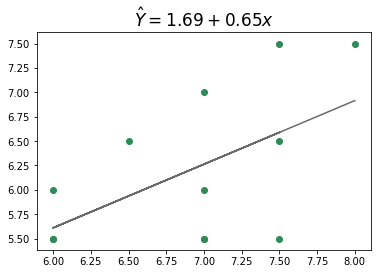

In [8]:
ms.graph.linregr(x_fondos, y_descuento)

Se puede observar que el modelo de regresión que obtuvimos nos muestra teóricamente la relación entre la tasa de descuento y la tasa de fondos federales; Por cada incremento en una unidad de la tasa de descuento, la tasa de fondos federales aumentará en 0.65 unidades.

**c. ¿Qué valor de tasa de descuento pronosticaría el modelo si en un año la tasa de fondos federales es de 7.5?**

In [9]:
model_federal(7.5)

6.5889830508474647

Según nuestro modelo de regresión lineal, si se tiene una tasa de fondos federales de **7.5**, el valor de tasa de descuento sería de **6.5889830508474647**.

**d. ¿Cuál es el error estándar de estimación para los datos analizados?**

In [10]:
se_federal = ms.linregr.get_se(x_fondos, y_descuento)
se_federal

0.6808519090330096

El error estándar que tienen estos datos analizados es de **0.6808519090330096** unidades.

**e. Calcule el coeficiente de correlación y el coeficiente de determinación para los datos analizados.**

In [11]:
r_federal = ms.linregr.get_r(x_fondos, y_descuento)
r_federal

0.5577806681462556

El coeficiente de correlación para los datos analizados es **0.5577806681462556**. Lo que indica una débil relación entre la tasa de descuento y la tasa de fondos federales.

In [12]:
r2_federal = ms.linregr.get_r2(x_fondos, y_descuento)
r2_federal

0.31111927375768333

El coeficiente de determinación para los datos analizados es **0.31111927375768333**. Lo que establece que el 31.1% del cambio en la tasa de descuento se explica mediante un cambio en la tasa de fondos federales.

**f. ¿La relación entre la tasa de descuento y la tasa de fondos federales que está analizando es significativa? Pruebe la hipótesis a un nivel de significancia del 1%.**

* **Nivel de significancia**

In [13]:
sign_federal = 0.01

* **Plantear las hipótesis**

$H_0: β_1 = 0$ -> *La pendiente de la recta de regresión poblacional es cero*

$H_A: β_1 ≠ 0$ -> *La pendiente de la recta de regresión poblacional es diferente de cero*

* **Valores críticos**

In [14]:
df_federal = len(x_fondos) - 2

In [15]:
crit_federal = ms.hypothesis.crit_val_t(df_federal, sign_federal, 'two')
crit_federal

(-3.169272667175838, 3.169272667175838)

* **Estadístico de prueba (T)**

In [16]:
t_federal = ms.linregr.get_t_beta(x_fondos, y_descuento)
t_federal

2.125159061330204

* **Decisión**

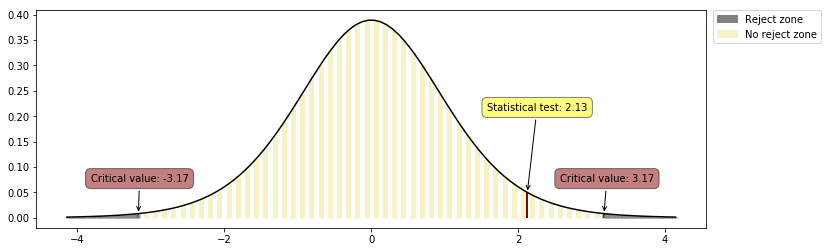

In [17]:
distr_federal = ss.t(df_federal)
ms.graph.hypothesis(distr_federal, t_federal, sign_federal, 'two')

**NO se rechaza la hipótesis nula.** Dado que el estadístico de prueba *2.125159061330204* no es **mayor/menor** que los valores críticos calculados *(-3.169272667175838, 3.169272667175838)*. Por lo que cae en la zona de **NO RECHAZO** con un nivel de significancia del 1%.

* **Conclusión**

Entonces, se puede concluir que la relación entre la tasa de descuento y la tasa de fondos federales **no es significativa**, teniendo en cuenta un nivel de significancia del 1%.

***
***

### 2.
Los economistas han sostenido durante mucho tiempo que la demanda de dinero por una
comunidad se ve afectada por 1) el nivel de ingreso y 2) la tasa de interés. A medida que el
ingreso aumenta, las personas desean guardar más dinero para facilitar el incremento de
sus transacciones diarias. A medida que la tasa de interés aumenta, las personas deciden
mantener menos dinero debido a la oportunidad de invertirlo a una tasa de interés más
elevada.
Un economista del gobierno hace regresión de la demanda de dinero (D), el ingreso (I) y
las tasas de interés (R), en donde D se expresa en cientos de dólares e I en miles de
dólares. El modelo es:

$$\hat{D} ̂= 0.44+5.49I+6.4R$$

Una tabla parcial ANOVA:

|Fuente|Suma de cuadrados|Grados de libertad|
|-|
|Entre muestras|93.59|2|
|Dentro de muestras|1.42|9|

Si el error estándar del coeficiente para I es 1.37 y el de R es 43.6, determine cual variable
es (o cuales variables son) significante al nivel del 1%. Plantee la hipótesis, la regla de
decisión y la conclusión.

***

### Ingreso (I)

* **Nivel de significancia**

In [18]:
sign_ingreso = 0.01

* **Plantear hipótesis**

$H_0 : β_1 = 0$ *El ingreso no contribuye significativamente al poder explicativo del modelo.*

$H_A : β_1 ≠ 0$ *El ingreso contribuye significativamente al poder explicativo del modelo.*

* **Valores críticos**

In [19]:
df_ingreso = 9

In [20]:
crit_ingreso = ms.hypothesis.crit_val_t(df_ingreso, sign_ingreso, 'two')
crit_ingreso

(-3.2498355440153697, 3.2498355440153697)

* **Estadístico de prueba (T)**

$$t = \frac{b_1 - β_1}{S_{b_1}}$$

In [21]:
b_ingreso = 5.49
beta_ingreso = 0
sb_ingreso = 1.37

In [22]:
t_ingreso = ms.multiregr.t_regression(b_ingreso, beta_ingreso, sb_ingreso)
t_ingreso

4.007299270072992

* **Decisión**

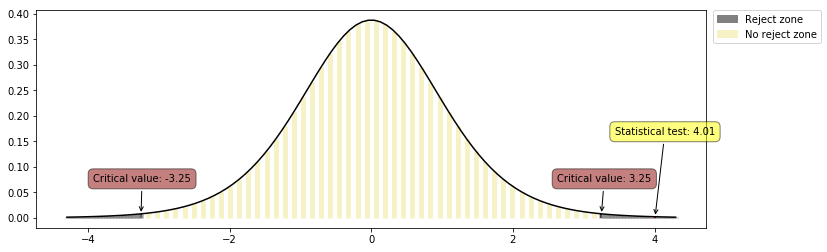

In [23]:
distr_ingreso = ss.t(df_ingreso)
ms.graph.hypothesis(distr_ingreso, t_ingreso, sign_ingreso, 'two')

**SI se rechaza la hipótesis nula** Dado que el estadístico de prueba *4.007299270072992* es **mayor** que el valor crítico calculado *3.2498355440153697*. Por lo que cae en la zona de **RECHAZO**.

* **Conclusión**

Entonces, se puede concluir que la variable independiente **ingreso** si contribuye significativamente al valor explicativo del modelo.

### Tasas de interés (R)

* **Nivel de significancia**

In [24]:
sign_tasas = 0.01

* **Plantear hipótesis**

$H_0 : β_2 = 0$ *Las tasas de interés no contribuyen significativamente al poder explicativo del modelo.*

$H_A : β_2 ≠ 0$ *Las tasas de interés contribuyen significativamente al poder explicativo del modelo.*

* **Valores críticos**

In [25]:
df_tasas = 9

In [26]:
crit_tasas = ms.hypothesis.crit_val_t(df_tasas, sign_tasas, 'two')
crit_tasas

(-3.2498355440153697, 3.2498355440153697)

* **Estadístico de prueba (T)**

$$t = \frac{b_2 - β_2}{S_{b_2}}$$

In [27]:
b_tasas = 6.4
beta_tasas = 0
sb_tasas = 43.6

In [28]:
t_tasas = ms.multiregr.t_regression(b_tasas, beta_tasas, sb_tasas)
t_tasas

0.14678899082568808

* **Decisión**

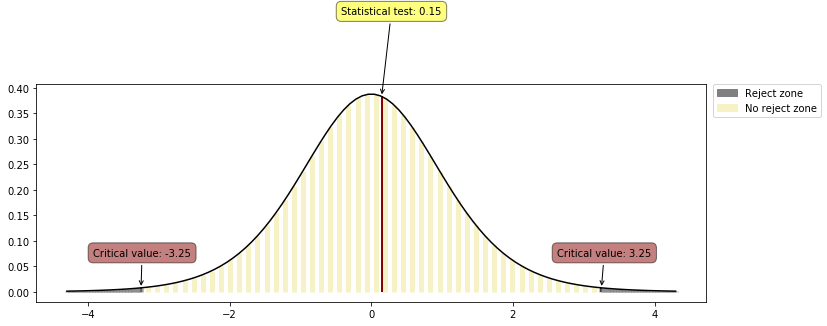

In [29]:
distr_tasas = ss.t(df_tasas)
ms.graph.hypothesis(distr_tasas, t_tasas, sign_tasas, 'two')

**NO se rechaza la hipótesis nula**. Dado que el estadístico de prueba *0.14678899082568808* no es **mayor/menor** que los estadísticos de prueba calculados *(-3.2498355440153697, 3.2498355440153697)*. Por lo que cae en la zona de **NO RECHAZO**.

* **Conclusión**

Entonces, se puede decir que la variable independiente de las **tasas de interés** no contribuye significativamente al valor explicativo del modelo.

***
***

### 3.
Se tienen los datos para Vinnie's Video Village.


|Año|Periodo|Utilidades (cientos de dólares)|
|-|
|1996|Enero|10|
|1996|Febrero|9|
|1996|Marzo|11|
|1996|Abril|12|
|1996|Mayo|18|
|1996|Junio|23|
|1996|Julio|27|
|1996|Agosto|26|
|1996|Septiembre|18|
|1996|Octubre|13|
|1996|Noviembre|10|
|1996|Diciembre|10|
|1997|Enero|9|
|1997|Feberero|11|
|1997|Marzo|10|
|1997|Abril|12|
|1997|Mayo|19|
|1997|Junio|25|
|1997|Julio|28|
|1997|Agosto|31|
|1997|Septiembre|22|
|1997|Octubre|15|
|1997|Noviembre|11|
|1997|Diciembre|12|
|1998|Enero|10|
|1998|Febrero|8|
|1998|Marzo|10|
|1998|Abril|12|
|1998|Mayo|19|
|1998|Junio|25|
|1998|Julio|29|
|1998|Agosto|31|
|1998|Septiembre|21|
|1998|Octubre|16|
|1998|Noviembre|18|
|1998|Diciembre|19|







**a)** A simple vista que puede deducir de los datos.

**b)** Calcule el promedio móvil para 12 periodos. ¿Cuál sería la proyección para enero de 1999?

**c)** ¿La proyección encontrada incluye el componente estacional?
***

**a. A simple vista que puede deducir de los datos.** 

Se logra apreciar que los datos se comportan de manera estacional, pues se nota que a principio de año las ventas son muy bajas, y mientras que transcurre el año aumentan, y vuelven a caer cuando llega el fin de año.

**b. Calcule el promedio móvil para 12 periodos. ¿Cuál sería la proyección para enero de 1999?**

In [30]:
x_vinnies = [
    10, 9, 11, 12, 18, 23, 27, 26, 18, 13, 10, 10, 9, 11, 10, 12, 19, 
    25, 28, 31, 22, 15, 11, 12, 10, 8, 10, 12, 19, 25, 29, 31, 21, 16, 
    18, 19
]

t_vinnies = list(range(1, len(x_vinnies) + 1))

N_vinnies = 12

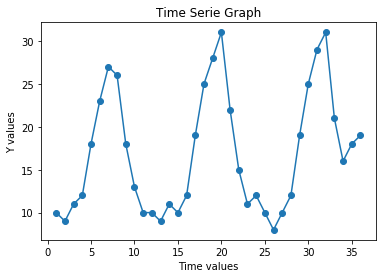

In [31]:
ms.graph.timeserie(x_vinnies, t_vinnies)

In [32]:
rm_vinnies = ms.timeseries.running_mean(x_vinnies, N_vinnies)
rm_vinnies

[15.541666666666668,
 15.583333333333332,
 15.625,
 15.583333333333336,
 15.625000000000004,
 15.75,
 15.875,
 16.125000000000007,
 16.5,
 16.75,
 16.875,
 17.0,
 17.125,
 17.041666666666657,
 16.91666666666667,
 16.916666666666686,
 16.916666666666686,
 16.916666666666686,
 16.958333333333343,
 17.0,
 16.958333333333343,
 16.958333333333343,
 17.291666666666657,
 17.875]

**R//** La proyección esperada para enero de 1999 según nuestro promedio móvil, sería de **17.875** cientos de dólares en utilidades.

**c. ¿La proyección encontrada incluye el componente estacional?** 

In [33]:
t_rm = list(range(1, len(rm_vinnies) + 1))

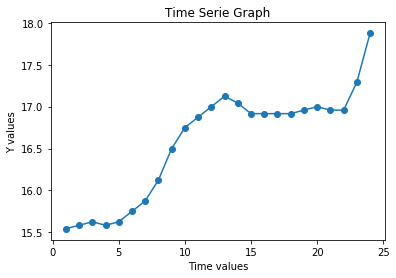

In [34]:
ms.graph.timeserie(rm_vinnies, t_rm)

**R//** Como se puede apreciar, luego de aplicar la técnica de suavizamiento de promedio móvil para 12 periodos, se logra eliminar el componente estacional de la serie; por lo que se puede decir que ésta proyección encontrada no está siendo afectada por el componente estacional.

***